In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import seaborn as sns
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
def loadData(N):
    iris = sns.load_dataset("iris")

    data = torch.tensor(iris[iris.columns[0:4]].values).float()

    labels = torch.zeros(len(data), dtype=torch.long)
    labels[iris.species =="versicolor"] = 1
    labels[iris.species=="virginica"] = 2

    X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size=.8)

    trainData = TensorDataset(X_train, y_train)
    testData = TensorDataset(X_test, y_test)

    batchsize = 2**N
    train_loader = DataLoader(trainData, batch_size=batchsize)
    test_loader = DataLoader(testData, batch_size=labels.shape[0])
    
    return train_loader, test_loader

In [ ]:
def createModel():
    ANNiris = nn.Sequential(
        nn.Linear(4,64),
        nn.ReLU(),
        nn.Linear(64,64),
        nn.ReLU(),
        nn.Linear(64,3)
    )
    
    lossfun = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(ANNiris.parameters(), lr=.001)
    
    return ANNiris, lossfun, optimizer

def trainModel(ann, lossfun, optimizer, train_loader, test_loader):
    trainAcc = []
    testAcc = []
    
    for epoch in range(1000):
        batchAcc = []
        for X,y in train_loader:
            y_pred = ann(X)
            
            loss = lossfun(y_pred,y)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            batchAcc.append(100*torch.mean((torch.argmax(y_pred, axis=1) == y).float()).item())
            
            
        trainAcc.append(np.mean(batchAcc))
        X,y = next(iter(test_loader))
        y_pred = ann(X)
        testAcc.append(100*torch.mean((torch.argmax(y_pred, axis=1) == y).float()).item())
        
    return trainAcc, testAcc


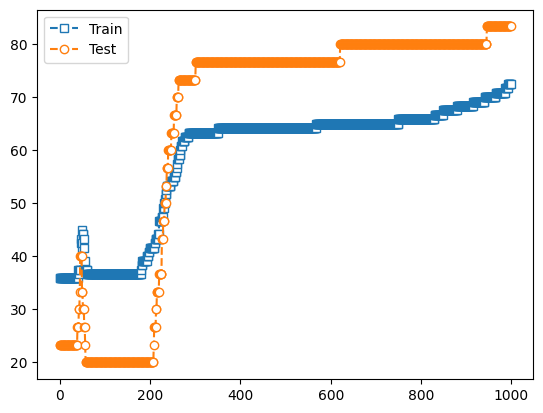

In [ ]:
tr, te = loadData(8)
net, l, o = createModel()
train, test= trainModel(net,l,o, tr, te)
plt.plot(train, "s--", markerfacecolor="w")
plt.plot(test, "o--",markerfacecolor="w")
plt.legend(["Train", "Test"])

In [ ]:
trainAcc = []
testAcc = []
for N in range(1,7):
    train_loader, test_loader = loadData(N)
    ann, lossfun, optim = createModel()
    train, test = trainModel(ann, lossfun, optim, train_loader, test_loader)
    trainAcc.append(train)
    testAcc.append(test)
    


In [ ]:
trainAcc = np.array(trainAcc)
testAcc = np.array(testAcc)

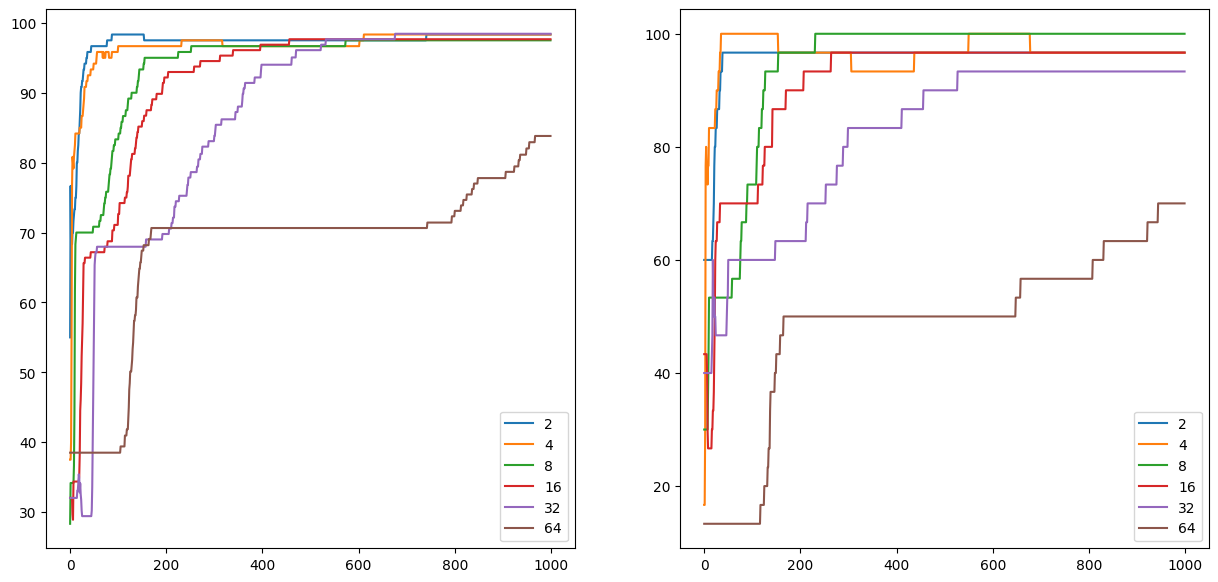

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15, 7))


ax[0].plot(trainAcc.T, "-")
ax[0].legend([str(2**i) for i in range(1, 7)])

ax[1].plot(testAcc.T, "-")
ax[1].legend([str(2**i) for i in range(1, 7)])